In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Importing and Preprocessing the Data**

In [2]:
ETHdata = pd.read_csv('/kaggle/input/gq-implied-volatility-forecasting/train/ETH.csv')
ETHdata.head(15)

,timestamp,mid_price,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,...,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5,label
0,2024-09-25 18:13:28,2581.605,2581.60,2980.3,2581.59,44.8,2581.56,139.1,2581.54,86.3,...,339.0,2581.67,9.2,2581.69,0.2,2581.70,23.4,2581.71,1.2,0.000060
1,2024-09-25 18:13:29,2581.285,2581.28,1400.6,2581.22,7.8,2581.19,5.0,2581.18,67.1,...,807.2,2581.30,144.4,2581.31,32.0,2581.32,151.0,2581.33,67.1,0.000057
2,2024-09-25 18:13:30,2581.285,2581.28,875.2,2581.22,7.8,2581.20,64.2,2581.19,5.0,...,807.5,2581.30,144.4,2581.31,32.0,2581.32,151.0,2581.33,52.0,0.000080
3,2024-09-25 18:13:31,2581.105,2581.10,1980.0,2581.09,508.4,2581.08,0.2,2581.05,18.7,...,833.3,2581.15,171.1,2581.20,60.7,2581.29,123.5,2581.30,104.0,0.000087
4,2024-09-25 18:13:32,2581.105,2581.10,1995.5,2581.09,508.4,2581.08,0.2,2581.05,18.7,...,717.3,2581.15,132.0,2581.20,60.7,2581.29,69.2,2581.30,242.9,0.000090
5,2024-09-25 18:13:33,2581.275,2581.27,814.9,2581.21,32.0,2581.20,60.7,2581.18,5.0,...,472.3,2581.29,2.0,2581.30,23.4,2581.31,32.0,2581.32,132.1,0.000091
6,2024-09-25 18:13:34,2581.275,2581.27,741.0,2581.20,60.7,2581.18,5.0,2581.17,5.0,...,142.4,2581.29,2.0,2581.31,32.0,2581.32,132.1,2581.33,32.0,0.000090
7,2024-09-25 18:13:35,2581.455,2581.45,757.3,2581.43,15.3,2581.40,60.7,2581.34,53.4,...,1018.6,2581.47,32.2,2581.50,31.5,2581.54,114.2,2581.56,182.0,0.000090
8,2024-09-25 18:13:36,2581.455,2581.45,761.6,2581.43,15.3,2581.40,60.7,2581.34,53.4,...,1019.1,2581.47,32.2,2581.50,31.5,2581.54,114.2,2581.56,182.0,0.000087
9,2024-09-25 18:13:37,2581.455,2581.45,791.0,2581.40,60.7,2581.34,53.4,2581.32,103.8,...,1027.3,2581.47,32.2,2581.50,31.5,2581.54,114.2,2581.56,119.4,0.000087


In [3]:
# Cleaning the Dataset
ETHdata = ETHdata.reset_index()
ETHdata['timestamp'] = pd.to_datetime(ETHdata['timestamp'])
ETHdata = ETHdata.set_index('timestamp')

full_index = pd.date_range(start=ETHdata.index.min(), end=ETHdata.index.max(), freq='s')
df = ETHdata.reindex(full_index)

price_cols = ['mid_price'] + [f'bid_price{i}' for i in range(1, 6)] + [f'ask_price{i}' for i in range(1, 6)]
volume_cols = [f'bid_volume{i}' for i in range(1, 6)] + [f'ask_volume{i}' for i in range(1, 6)]
label_cols = ['label']  

df[price_cols] = df[price_cols].ffill()
df[volume_cols] = df[volume_cols].fillna(0)
df[label_cols] = df[label_cols].ffill()

nan_counts_after = df.isna().sum()
print("\nNaN counts after filling:\n", nan_counts_after)
ETHdata.reset_index(inplace=True)


NaN counts after filling:
 index          0
mid_price      0
bid_price1     0
bid_volume1    0
bid_price2     0
bid_volume2    0
bid_price3     0
bid_volume3    0
bid_price4     0
bid_volume4    0
bid_price5     0
bid_volume5    0
ask_price1     0
ask_volume1    0
ask_price2     0
ask_volume2    0
ask_price3     0
ask_volume3    0
ask_price4     0
ask_volume4    0
ask_price5     0
ask_volume5    0
label          0
dtype: int64


**Examining the Impact of Volume on Implied Volatility Spikes**

In [4]:

df['volume_increased'] = df['bid_volume1'] > df['bid_volume1'].shift(1)

df['label_next'] = df['label'].shift(-1)

Inc_filtered = df[df['volume_increased']]

def classify_change(row):
    if row['label_next'] > row['label']:
        return 'increase'
    elif row['label_next'] < row['label']:
        return 'decrease'
    else:
        return 'same'

Inc_filtered['label_change'] = Inc_filtered.apply(classify_change, axis=1)

result_counts = Inc_filtered['label_change'].value_counts()
result_percent = Inc_filtered['label_change'].value_counts(normalize=True) * 100

print("Counts:\n", result_counts)
print("\nPercentages:\n", result_percent)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Counts:
 label_change
same        126692
decrease     89545
increase     82165
Name: count, dtype: int64

Percentages:
 label_change
same        42.456820
decrease    30.008177
increase    27.535003
Name: proportion, dtype: float64


/tmp/ipykernel_36/1558712176.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inc_filtered['label_change'] = Inc_filtered.apply(classify_change, axis=1)


In [5]:
df['askvolume_increased'] = df['ask_volume1'] > df['ask_volume1'].shift(1)


Inc_Ask_filtered = df[df['askvolume_increased']]

def classify_change(row):
    if row['label_next'] > row['label']:
        return 'increase'
    elif row['label_next'] < row['label']:
        return 'decrease'
    else:
        return 'same'

Inc_Ask_filtered['label_change'] = Inc_Ask_filtered.apply(classify_change, axis=1)

result_counts = Inc_Ask_filtered['label_change'].value_counts()
result_percent = Inc_Ask_filtered['label_change'].value_counts(normalize=True) * 100

print("Counts:\n", result_counts)
print("\nPercentages:\n", result_percent)

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


Counts:
 label_change
same        125248
decrease     89729
increase     82506
Name: count, dtype: int64

Percentages:
 label_change
same        42.102574
decrease    30.162732
increase    27.734694
Name: proportion, dtype: float64


/tmp/ipykernel_36/1420162106.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Inc_Ask_filtered['label_change'] = Inc_Ask_filtered.apply(classify_change, axis=1)


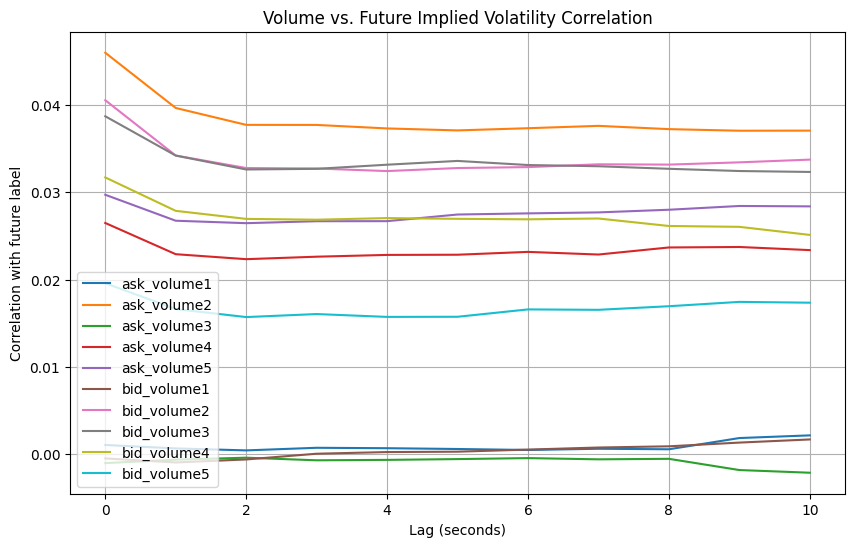

In [6]:

ask_vol_cols = [f'ask_volume{i}' for i in range(1, 6)]
bid_vol_cols = [f'bid_volume{i}' for i in range(1, 6)]
vol_cols = ask_vol_cols + bid_vol_cols

max_lag = 10  # checking up to 10 seconds lag
lag_results = {col: [] for col in vol_cols}


for lag in range(max_lag + 1):
    shifted_label = df['label'].shift(-lag)  
    for col in vol_cols:
        corr = df[col].corr(shifted_label)
        lag_results[col].append(corr)


plt.figure(figsize=(10, 6))
for col in vol_cols:
    plt.plot(range(max_lag + 1), lag_results[col], label=col)

plt.xlabel("Lag (seconds)")
plt.ylabel("Correlation with future label")
plt.title("Volume vs. Future Implied Volatility Correlation")
plt.legend()
plt.grid(True)
plt.show()




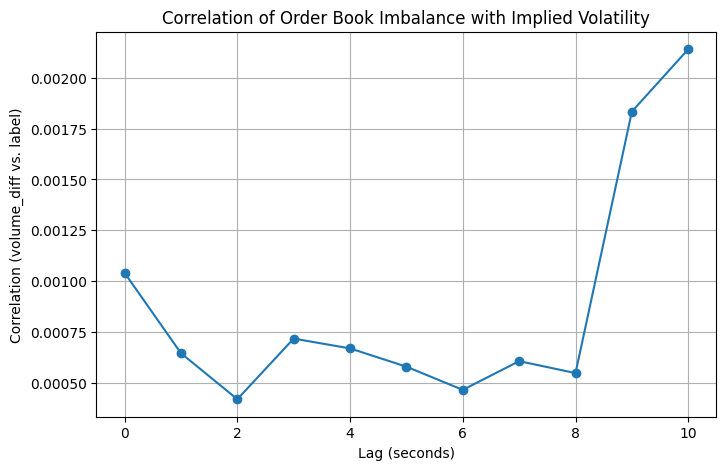

In [7]:
df['total_ask_volume'] = df[[f'ask_volume{i}' for i in range(1, 6)]].sum(axis=1)
df['total_bid_volume'] = df[[f'bid_volume{i}' for i in range(1, 6)]].sum(axis=1)
df['volume_diff'] = df['total_ask_volume'] - df['total_bid_volume']


max_lag = 10  #  10 seconds
lag_corr = []

for lag in range(max_lag + 1):
    shifted_label = df['label'].shift(-lag)  # future label
    corr = df['volume_diff'].corr(shifted_label)
    lag_corr.append(corr)

plt.figure(figsize=(8, 5))
plt.plot(range(max_lag + 1), lag_corr, marker='o', linestyle='-')
plt.xlabel("Lag (seconds)")
plt.ylabel("Correlation (volume_diff vs. label)")
plt.title("Correlation of Order Book Imbalance with Implied Volatility")
plt.grid(True)
plt.show()

**Utilizing Order Book Columns as Features in a LightGBM Model**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 505033, number of used features: 21
[LightGBM] [Info] Start training from score 0.000049
RMSE: 0.0001
R² Score: -0.0040


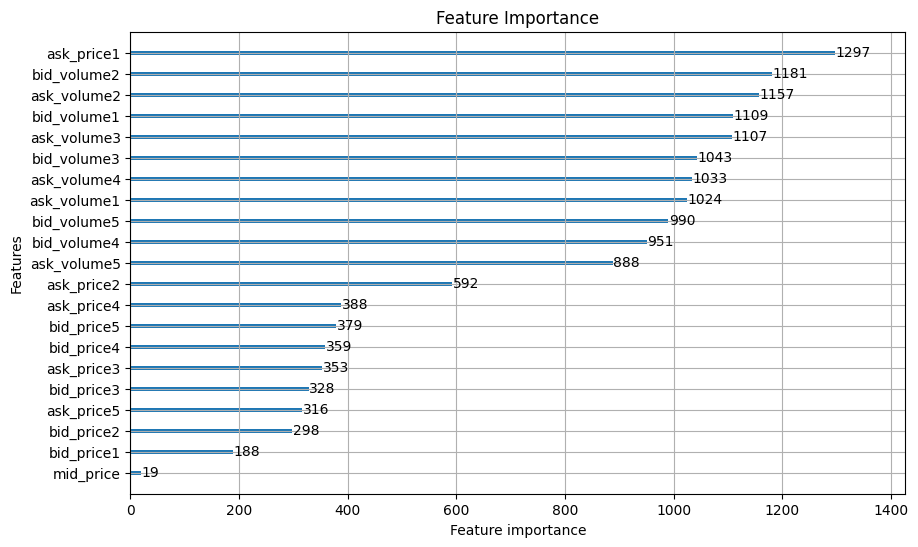

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

# Using all current price and volume columns as a feature 
price_cols = [f'ask_price{i}' for i in range(1, 6)] + [f'bid_price{i}' for i in range(1, 6)] + ['mid_price']
volume_cols = [f'ask_volume{i}' for i in range(1, 6)] + [f'bid_volume{i}' for i in range(1, 6)]
features = price_cols + volume_cols

X = df[features]
y = df['label']

train_size = 0.8
split_index = int(len(df) * train_size)

X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

#  Training LightGBM Model 
model = lgb.LGBMRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

import matplotlib.pyplot as plt

lgb.plot_importance(model, figsize=(10, 6))
plt.title("Feature Importance")
plt.show()


**Adding Lagged and Tailored Features**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5524
[LightGBM] [Info] Number of data points in the train set: 568162, number of used features: 24
[LightGBM] [Info] Start training from score 0.000056


/tmp/ipykernel_36/2300179918.py:125: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_pred[0] = y_test[0]  # first value fallback


RMSE : 0.00008257
sMAPE: 43.8547%
MASE : 3.7158
R²   : 0.3041

Top feature importances:
 mid_return_t3          3217
mid_return_t4          3170
mid_return_t2          3164
mid_return_t8          3141
mid_return_t1          3111
mid_return_t9          3083
mid_return_t5          3080
mid_return_t7          3071
mid_return_t6          3066
mid_return_t10         3007
ask_total_vol_roll5    2930
bid_total_vol_roll5    2818
mid_change             2647
ask_v1_ratio           2506
imbalance              2358
dtype: int32


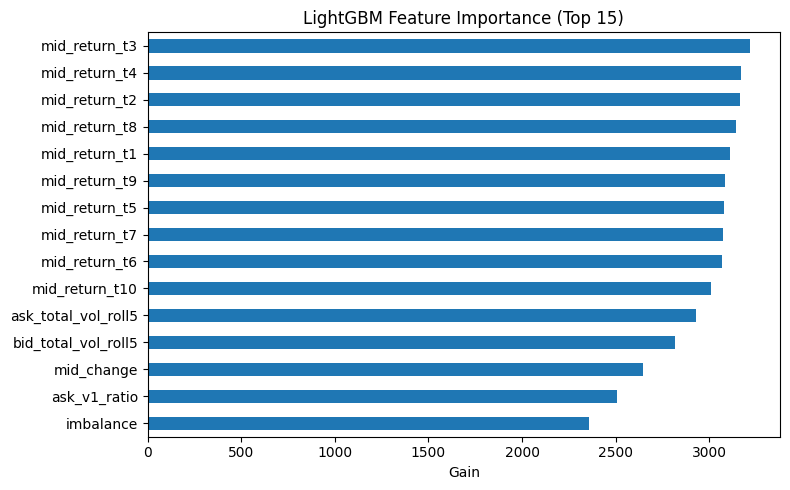

In [9]:
!pip install lightgbm --quiet
from statistics import mode
from sklearn.metrics import  mean_absolute_error

# Using different Price and Volume combinations (Also Lagged)as a feature 
def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')

    # Mid price
    df['mid_price'] = (df['ask_price1'] + df['bid_price1']) / 2


    df['spread'] = df['ask_price1'] - df['bid_price1']

    # Price Ranges
    df['ask_price_range'] = df['ask_price1'] - df['ask_price5']
    df['bid_price_range'] = df['bid_price5'] - df['bid_price1']

    # Relative Distance 
    df['ask_rel_dist'] = (df['ask_price1'] / df['mid_price']) - 1.0
    df['bid_rel_dist'] = 1.0 - (df['bid_price1'] / df['mid_price'])

    # Total Volumes 
    ask_vol_cols = [f'ask_volume{i}' for i in range(1, 6)]
    bid_vol_cols = [f'bid_volume{i}' for i in range(1, 6)]
    df['total_ask_vol'] = df[ask_vol_cols].sum(axis=1)
    df['total_bid_vol'] = df[bid_vol_cols].sum(axis=1)

    df['abs_ask_vol_change1'] = (abs(df['ask_volume1'] - df['ask_volume1'].shift(2)) + abs(df['ask_volume2'] - df['ask_volume2'].shift(2)) + abs(df['ask_volume3'] - df['ask_volume3'].shift(2)) + abs(df['ask_volume4'] - df['ask_volume4'].shift(2)) + abs(df['ask_volume5'] - df['ask_volume5'].shift(2)))
    df['abs_bid_vol_change1'] = (abs(df['bid_volume1'] - df['bid_volume1'].shift(2)) + abs(df['bid_volume2'] - df['bid_volume2'].shift(2)) + abs(df['bid_volume3'] - df['bid_volume3'].shift(2)) + abs(df['bid_volume4'] - df['bid_volume4'].shift(2)) + abs(df['bid_volume5'] - df['bid_volume5'].shift(2)))

    # Ask Bid Vol Imbalance 
    df['imbalance'] = df['total_bid_vol'] / (df['total_bid_vol'] + df['total_ask_vol'] + 1e-9)

    # Volume Depth Ratios ---
    df['ask_v1_ratio'] = df['ask_volume1'] / (df['total_ask_vol'] + 1e-9)
    df['bid_v1_ratio'] = df['bid_volume1'] / (df['total_bid_vol'] + 1e-9)


   # V5 Volume Slope
    df['ask_v5_ratio'] = df['ask_volume5'] / (df['total_ask_vol'] + 1e-9)
    df['bid_v5_ratio'] = df['bid_volume5'] / (df['total_bid_vol'] + 1e-9)

   # Rolling Volume
    df["ask_total_vol_roll5"] = df["total_ask_vol"].rolling(window=5, min_periods=1).sum()
    df["bid_total_vol_roll5"] = df["total_bid_vol"].rolling(window=5, min_periods=1).sum()

   # Lagged returns till 10 sec 
    df['mid_change'] = abs(df['mid_price'] - df['mid_price'].shift(1))
    df['mid_return'] = df['mid_price'].pct_change()
    df['mid_return_t1'] = df['mid_return'].shift(1).fillna(0)
    df['mid_return_t2'] = df['mid_return'].shift(2).fillna(0)
    df['mid_return_t3'] = df['mid_return'].shift(3).fillna(0)
    df['mid_return_t4'] = df['mid_return'].shift(4).fillna(0)
    df['mid_return_t5'] = df['mid_return'].shift(5).fillna(0)
    df['mid_return_t6'] = df['mid_return'].shift(6).fillna(0)
    df['mid_return_t7'] = df['mid_return'].shift(7).fillna(0)
    df['mid_return_t8'] = df['mid_return'].shift(8).fillna(0)
    df['mid_return_t9'] = df['mid_return'].shift(9).fillna(0)
    df['mid_return_t10'] = df['mid_return'].shift(10).fillna(0)
    return df


df = engineer_features(df)

engineered_features = [
    'ask_price_range', 'bid_price_range',
    'imbalance',
    'ask_v1_ratio', 'bid_v1_ratio',
     'ask_v5_ratio' , 'bid_v5_ratio' ,
     'mid_return' , 'spread' ,'mid_return_t6' ,  'mid_return_t5' ,
     'mid_return_t1' , 'mid_return_t3', 'mid_return_t2'
      ,'mid_return_t4' , 'mid_return_t7', 'mid_return_t8'
     , 'mid_return_t9' , 'mid_return_t10' , "ask_total_vol_roll5" , "bid_total_vol_roll5" , 'abs_ask_vol_change1' , 'abs_bid_vol_change1' , 'mid_change'

]




features = engineered_features
target = 'label'


df = df.dropna(subset=[target])


X = df[features].copy()
y = df[target].copy()


X = X.ffill().bfill()


train_size = 0.9
split_idx = int(len(X) * train_size)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# Training LightGBM model
model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    num_leaves=63,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train)

# Evaluate ==========
y_pred = model.predict(X_test)


# sMAPE
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred) + 1e-9))

# MASE (naive forecast = previous value)
naive_pred = np.roll(y_test, 1)
naive_pred[0] = y_test[0]  # first value fallback
mase = mean_absolute_error(y_test, y_pred) / mean_absolute_error(y_test, naive_pred)

# R²
r2   = r2_score(y_test, y_pred)

# Print metrics
print(f"RMSE : {rmse:.8f}")
print(f"sMAPE: {smape:.4%}")
print(f"MASE : {mase:.4f}")
print(f"R²   : {r2:.4f}")

# Feature importance
importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop feature importances:\n", importances.head(15))

plt.figure(figsize=(8, 5))
importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("LightGBM Feature Importance (Top 15)")
plt.xlabel("Gain")
plt.tight_layout()
plt.show()



**Analysing the Cross-Asset Correlations** 

In [10]:

def restore_seconds(df, time_col="timestamp", fmt="%d-%m-%Y %H:%M"):

    df[time_col] = pd.to_datetime(df[time_col], format=fmt)

    df["_row_in_minute"] = df.groupby(time_col).cumcount()

    def add_seconds(group):
        n = len(group)
        if n == 60:
            secs = range(60)
        else:
            secs = range(60 - n, 60)
        group[time_col] = group[time_col].iloc[0] + pd.to_timedelta(list(secs), unit="s")
        return group

    df = df.groupby(time_col, group_keys=False).apply(add_seconds)
    df = df.drop(columns="_row_in_minute")


    price_cols = ['mid_price'] + [f'bid_price{i}' for i in range(1, 6)] + [f'ask_price{i}' for i in range(1, 6)]
    volume_cols = [f'bid_volume{i}' for i in range(1, 6)] + [f'ask_volume{i}' for i in range(1, 6)]

    df[price_cols] = df[price_cols].ffill()
    df[volume_cols] = df[volume_cols].fillna(0)

    return df.reset_index(drop=True)

In [11]:
# Loading and preprocessing the data 
BTCdata  = restore_seconds(pd.read_csv('/kaggle/input/gq-implied-volatility-forecasting/train/BTC.csv'))
DOGEdata = restore_seconds(pd.read_csv('/kaggle/input/gq-implied-volatility-forecasting/train/DOGE.csv'))
DOTdata  = restore_seconds(pd.read_csv('/kaggle/input/gq-implied-volatility-forecasting/train/DOT.csv'))
LINKdata = restore_seconds(pd.read_csv('/kaggle/input/gq-implied-volatility-forecasting/train/LINK.csv'))
SHIBdata = restore_seconds(pd.read_csv('/kaggle/input/gq-implied-volatility-forecasting/train/SHIB.csv'))
SOLdata  = restore_seconds(pd.read_csv('/kaggle/input/gq-implied-volatility-forecasting/train/SOL.csv'))

/tmp/ipykernel_36/2742187756.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(time_col, group_keys=False).apply(add_seconds)
/tmp/ipykernel_36/2742187756.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(time_col, group_keys=False).apply(add_seconds)
/tmp/ipykernel_36/2742187756.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This be

In [12]:
df = df.reset_index()
df = df.rename(columns={'level_0': 'timestamp'})
df['mid_return'].head(10)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0         NaN
1   -0.000124
2    0.000000
3   -0.000070
4    0.000000
5    0.000066
6    0.000000
7    0.000070
8    0.000000
9    0.000000
Name: mid_return, dtype: float64

In [13]:
BTCdata.head()

,timestamp,mid_price,bid_price1,bid_volume1,bid_price2,bid_volume2,bid_price3,bid_volume3,bid_price4,bid_volume4,...,ask_price1,ask_volume1,ask_price2,ask_volume2,ask_price3,ask_volume3,ask_price4,ask_volume4,ask_price5,ask_volume5
0,2024-09-25 18:13:28,63229.95,63229.9,1290.0,63229.2,0.1,63228.0,38.5,63227.8,3.2,...,63230.0,392.9,63232.0,16.0,63232.6,4.4,63233.4,40.8,63234.0,16.0
1,2024-09-25 18:13:29,63222.05,63222.0,794.2,63221.9,34.6,63221.7,1.0,63221.2,1.0,...,63222.1,1375.7,63222.9,123.1,63223.3,75.3,63223.6,33.1,63224.0,16.0
2,2024-09-25 18:13:30,63222.05,63222.0,777.7,63221.9,34.6,63221.2,1.0,63221.0,0.1,...,63222.1,1453.6,63222.9,123.1,63223.3,75.3,63223.6,33.1,63224.0,16.0
3,2024-09-25 18:13:31,63222.05,63222.0,727.5,63221.9,34.6,63221.2,1.0,63221.0,0.1,...,63222.1,1367.4,63222.9,123.1,63223.3,75.3,63223.6,33.1,63224.0,16.0
4,2024-09-25 18:13:32,63222.05,63222.0,779.9,63221.9,34.6,63221.2,1.0,63221.0,0.1,...,63222.1,1349.6,63222.9,123.1,63223.3,75.3,63223.6,33.1,63224.0,16.0


**Correlation Analysis of ETH with Other Assets** (Ambiguity)

The percentage change in Ethereum’s price was expected to be more strongly correlated with other cryptocurrencies. However, the results show that while the other cryptocurrencies exhibit close correlations with each other, Ethereum does not. This suggests a potential issue with the data.

Correlation: -0.0025683943307345733


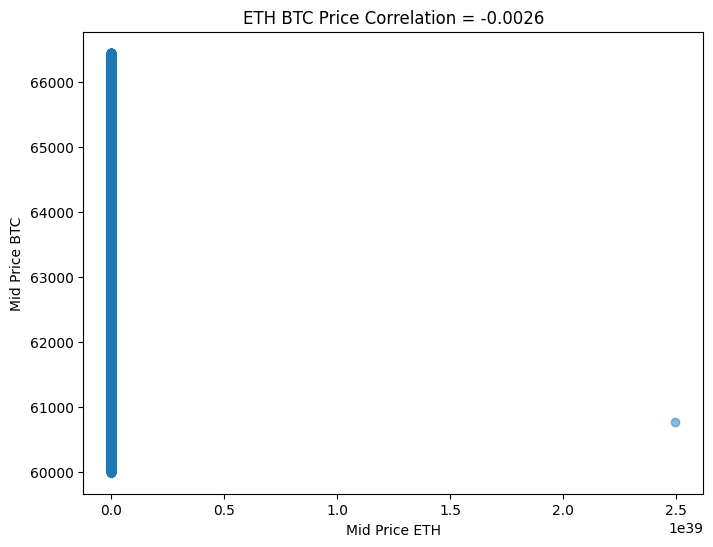

In [14]:
merged = pd.merge(ETHdata[['mid_price']], BTCdata[['mid_price']], 
                  left_index=True, right_index=True, 
                  suffixes=('_1', '_2'))

corr = merged['mid_price_1'].corr(merged['mid_price_2'])
print("Correlation:", corr)

plt.figure(figsize=(8,6))
plt.scatter(merged['mid_price_1'], merged['mid_price_2'], alpha=0.5)
plt.xlabel("Mid Price ETH")
plt.ylabel("Mid Price BTC")
plt.title(f"ETH BTC Price Correlation = {corr:.4f}")
plt.show()

/tmp/ipykernel_36/1368877688.py:1: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  merged['ret_1'] = merged['mid_price_1'].pct_change()


Return correlation: 0.0043450289675682156


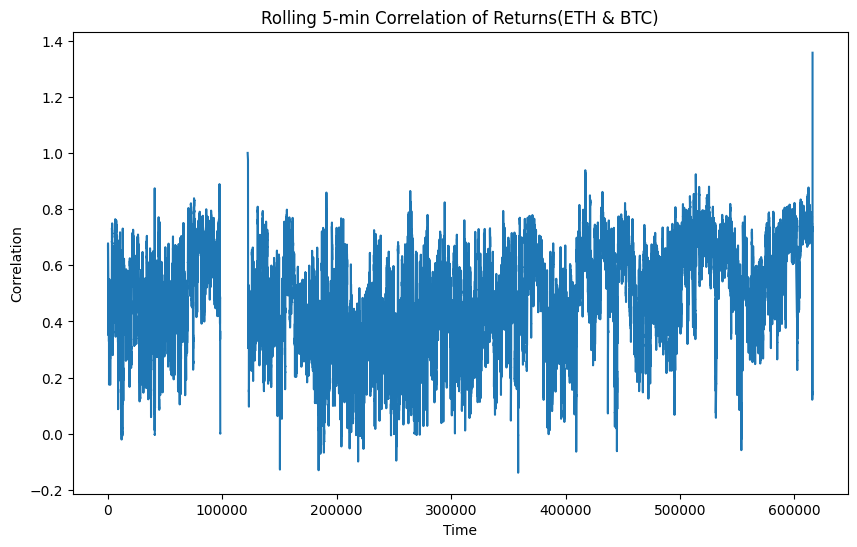

In [15]:
merged['ret_1'] = merged['mid_price_1'].pct_change()
merged['ret_2'] = merged['mid_price_2'].pct_change()

returns = merged[['ret_1', 'ret_2']].dropna()

# Correlation
corr_ret = returns['ret_1'].corr(returns['ret_2'])
print("Return correlation:", corr_ret)

# Rolling correlation to check time variation
rolling_corr = returns['ret_1'].rolling(300).corr(returns['ret_2'])  # 5-min window

plt.figure(figsize=(10,6))
plt.plot(rolling_corr)
plt.title("Rolling 5-min Correlation of Returns(ETH & BTC)")
plt.ylabel("Correlation")
plt.xlabel("Time")
plt.show()

Correlation: 0.922624060544084


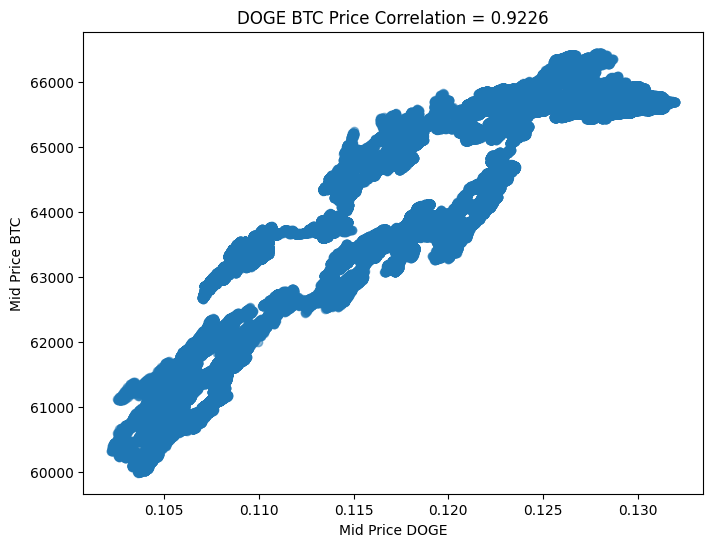

In [16]:
merged = pd.merge(DOGEdata[['mid_price']], BTCdata[['mid_price']], 
                  left_index=True, right_index=True, 
                  suffixes=('_1', '_2'))

corr = merged['mid_price_1'].corr(merged['mid_price_2'])
print("Correlation:", corr)

plt.figure(figsize=(8,6))
plt.scatter(merged['mid_price_1'], merged['mid_price_2'], alpha=0.5)
plt.xlabel("Mid Price DOGE")
plt.ylabel("Mid Price BTC")
plt.title(f"DOGE BTC Price Correlation = {corr:.4f}")
plt.show()

Return correlation: 0.4481960430791103


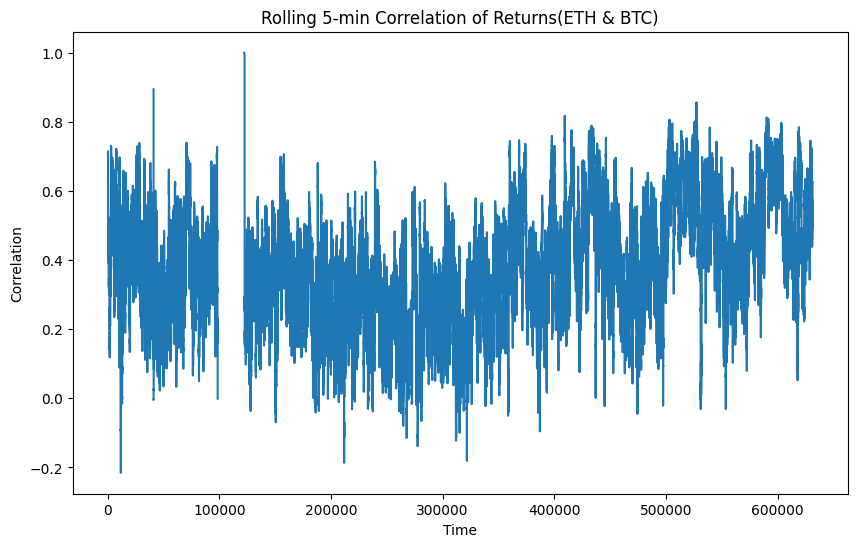

In [17]:
merged['ret_1'] = merged['mid_price_1'].pct_change()
merged['ret_2'] = merged['mid_price_2'].pct_change()

returns = merged[['ret_1', 'ret_2']].dropna()

# Correlation
corr_ret = returns['ret_1'].corr(returns['ret_2'])
print("Return correlation:", corr_ret)

# Rolling correlation to check time variation
rolling_corr = returns['ret_1'].rolling(300).corr(returns['ret_2'])  # 5-min window

plt.figure(figsize=(10,6))
plt.plot(rolling_corr)
plt.title("Rolling 5-min Correlation of Returns(ETH & BTC)")
plt.ylabel("Correlation")
plt.xlabel("Time")
plt.show()

In [18]:
# Forming a Correlation Matrix

ETHdata['mid_return'] = ETHdata['mid_price'].pct_change()
BTCdata['mid_return_BTC'] = BTCdata['mid_price'].pct_change()
DOGEdata['mid_return_DOGE'] = DOGEdata['mid_price'].pct_change()
DOTdata['mid_return_DOT'] = DOTdata['mid_price'].pct_change()
LINKdata['mid_return_LINK'] = LINKdata['mid_price'].pct_change()
SHIBdata['mid_return_SHIB'] = SHIBdata['mid_price'].pct_change()

# Merging all on timestamp
df_all = ETHdata[['timestamp', 'mid_return']].merge(
    BTCdata[['timestamp', 'mid_return_BTC']], on='timestamp', how='inner'
).merge(
    DOGEdata[['timestamp', 'mid_return_DOGE']], on='timestamp', how='inner'
).merge(
    DOTdata[['timestamp', 'mid_return_DOT']], on='timestamp', how='inner'
).merge(
    LINKdata[['timestamp', 'mid_return_LINK']], on='timestamp', how='inner'
).merge(
    SHIBdata[['timestamp', 'mid_return_SHIB']], on='timestamp', how='inner'
)


df_all = df_all.dropna()


/tmp/ipykernel_36/793965149.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ETHdata['mid_return'] = ETHdata['mid_price'].pct_change()


                 timestamp  mid_return  mid_return_BTC  mid_return_DOGE  \
timestamp         1.000000    0.002071       -0.002534        -0.003065   
mid_return        0.002071    1.000000        0.004345         0.003060   
mid_return_BTC   -0.002534    0.004345        1.000000         0.448196   
mid_return_DOGE  -0.003065    0.003060        0.448196         1.000000   
mid_return_DOT   -0.001876    0.002488        0.467944         0.457896   
mid_return_LINK  -0.002458    0.002003        0.490983         0.447413   
mid_return_SHIB  -0.003008    0.003353        0.375181         0.459412   

                 mid_return_DOT  mid_return_LINK  mid_return_SHIB  
timestamp             -0.001876        -0.002458        -0.003008  
mid_return             0.002488         0.002003         0.003353  
mid_return_BTC         0.467944         0.490983         0.375181  
mid_return_DOGE        0.457896         0.447413         0.459412  
mid_return_DOT         1.000000         0.452233         0.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


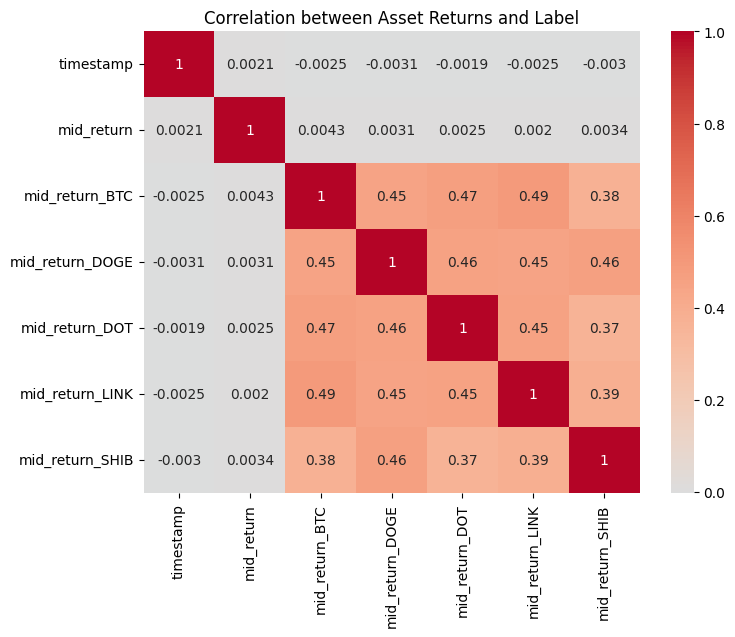

In [19]:
corr_matrix = df_all.corr()

print(corr_matrix)

# Heatmap visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation between Asset Returns and Label")
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')
    elif df.index.name != 'timestamp':
        df.index = pd.to_datetime(df.index)
        df.index.name = 'timestamp'

    # Mid price
    df['mid_price'] = (df['ask_price1'] + df['bid_price1']) / 2
    df['spread'] = df['ask_price1'] - df['bid_price1']

    # Price Ranges
    df['ask_price_range'] = df['ask_price1'] - df['ask_price5']
    df['bid_price_range'] = df['bid_price5'] - df['bid_price1']

    # Relative Distance of Prices 
    df['ask_rel_dist'] = (df['ask_price1'] / df['mid_price']) - 1.0
    df['bid_rel_dist'] = 1.0 - (df['bid_price1'] / df['mid_price'])

    # Total Volumes
    ask_vol_cols = [f'ask_volume{i}' for i in range(1, 6)]
    bid_vol_cols = [f'bid_volume{i}' for i in range(1, 6)]
    df['total_ask_vol'] = df[ask_vol_cols].sum(axis=1)
    df['total_bid_vol'] = df[bid_vol_cols].sum(axis=1)

    df['abs_ask_vol_change1'] = ((df['ask_volume1'] - df['ask_volume1'].shift(1)) + (df['ask_volume2'] - df['ask_volume2'].shift(1)) + (df['ask_volume3'] - df['ask_volume3'].shift(1)) + (df['ask_volume4'] - df['ask_volume4'].shift(1)) + (df['ask_volume5'] - df['ask_volume5'].shift(1)))
    df['abs_bid_vol_change1'] = ((df['bid_volume1'] - df['bid_volume1'].shift(1)) + (df['bid_volume2'] - df['bid_volume2'].shift(1)) + (df['bid_volume3'] - df['bid_volume3'].shift(1)) + (df['bid_volume4'] - df['bid_volume4'].shift(1)) + (df['bid_volume5'] - df['bid_volume5'].shift(1)))

    df['abs_ask_vol_change2'] = df['abs_ask_vol_change1'].shift(1)
    df['abs_bid_vol_change2'] = df['abs_bid_vol_change1'].shift(1)

    df['abs_ask_vol_change3'] = df['abs_ask_vol_change1'].shift(2)
    df['abs_bid_vol_change3'] = df['abs_bid_vol_change1'].shift(2)

    df['abs_ask_vol_change4'] = df['abs_ask_vol_change1'].shift(3)
    df['abs_bid_vol_change4'] = df['abs_bid_vol_change1'].shift(3)

    df['abs_ask_vol_change5'] = df['abs_ask_vol_change1'].shift(4)
    df['abs_bid_vol_change5'] = df['abs_bid_vol_change1'].shift(4)

    # Ask Bid Volume Imbalance
    df['imbalance'] = df['total_bid_vol'] -  df['total_ask_vol'] / (df['total_bid_vol'] + df['total_ask_vol'] + 1e-9)

    # Volume Depth Ratios
    df['ask_v1_ratio'] = df['ask_volume1'] / (df['total_ask_vol'] + 1e-9)
    df['bid_v1_ratio'] = df['bid_volume1'] / (df['total_bid_vol'] + 1e-9)

    df['ask_price3_change'] = df['ask_price3'] - df['ask_price3'].shift(3)
    df['bid_price3_change'] = df['bid_price3'] - df['bid_price3'].shift(3)


   # Volume Slope
    df['ask_v5_ratio'] = df['ask_volume5'] / (df['total_ask_vol'] + 1e-9)
    df['bid_v5_ratio'] = df['bid_volume5'] / (df['total_bid_vol'] + 1e-9)

    #  Rolling Volume
    df["ask_total_vol_roll5"] = df["total_ask_vol"].rolling(window=5, min_periods=1).sum()
    df["bid_total_vol_roll5"] = df["total_bid_vol"].rolling(window=5, min_periods=1).sum()

    # Lagged Return
    df['mid_change'] = abs(df['mid_price'] - df['mid_price'].shift(1))
    df['mid_return'] = df['mid_price'].pct_change()
    df['mid_return_t1'] = df['mid_return'].shift(1).fillna(0)
    df['mid_return_t2'] = df['mid_return'].shift(2).fillna(0)
    df['mid_return_t3'] = df['mid_return'].shift(3).fillna(0)
    df['mid_return_t4'] = df['mid_return'].shift(4).fillna(0)
    df['mid_return_t5'] = df['mid_return'].shift(5).fillna(0)
    df['mid_return_t6'] = df['mid_return'].shift(6).fillna(0)
    df['mid_return_t7'] = df['mid_return'].shift(7).fillna(0)
    df['mid_return_t8'] = df['mid_return'].shift(8).fillna(0)
    df['mid_return_t9'] = df['mid_return'].shift(9).fillna(0)
    df['mid_return_t10'] = df['mid_return'].shift(10).fillna(0)

    # Rolling Volatility
    df['vol_10s'] = df['mid_return'].rolling(window=10).std()
    df['vol_30s'] = df['mid_return'].rolling(window=30).std()
    df['vol_60s'] = df['mid_return'].rolling(window=60).std()

    # Price Momentum
    short_win = 10   #  10s window
    long_win = 60    #  60s window

    df['sma_short'] = df['mid_price'].rolling(window=short_win, min_periods=1).mean()
    df['sma_long'] = df['mid_price'].rolling(window=long_win, min_periods=1).mean()

    # Price momentum feature
    df['momentum'] = df['sma_short'] - df['sma_long']
    df['momentum_norm'] = df['momentum'] / df['sma_long']

    #Rolling Skew / Kurt
    for w in [10, 30, 60, 120]:  # 10s, 30s, 1m, 2m
        df[f'skew_{w}'] = df['mid_return'].rolling(window=w).skew().fillna(0)
        df[f'kurt_{w}'] = df['mid_return'].rolling(window=w).kurt().fillna(0)
    # RSI

    df['return'] = df['mid_price'].pct_change()
    df['up'] = df['return'].clip(lower=0)
    df['down'] = -df['return'].clip(upper=0)
    window = 10
    df['avg_up'] = df['up'].rolling(window).mean()
    df['avg_down'] = df['down'].rolling(window).mean()
    df['rsi_like'] = df['avg_up'] / (df['avg_down'] + 1e-8)
    df['rsi_10'] = 100 - (100 / (1 + df['rsi_like']))


    window1 = 30
    df['avg_up'] = df['up'].rolling(window1).mean()
    df['avg_down'] = df['down'].rolling(window1).mean()
    df['rsi_like'] = df['avg_up'] / (df['avg_down'] + 1e-8)
    df['rsi_30'] = 100 - (100 / (1 + df['rsi_like']))

    return df

    #Adding cross asset features
def add_other_assets_returns(df_main, others: dict, lags=[1], corr_windows=[30, 60]):
    for name, df_other in others.items():
        df_other['timestamp'] = pd.to_datetime(df_other['timestamp'])
        df_other = df_other.set_index('timestamp')

        df_other['mid_price'] = (df_other['ask_price1'] + df_other['bid_price1']) / 2
        df_other['total_volume'] = df_other[[f'ask_volume{i}' for i in range(1, 6)] +
                                            [f'bid_volume{i}' for i in range(1, 6)]].sum(axis=1)

        # Returns
        df_other['mid_return'] = df_other['mid_price'].pct_change()
        df_other['volume_return'] = df_other['total_volume'].pct_change()

        # Lagged returns
        for lag in lags:
            df_other[f'{name}_mid_return_t{lag}'] = df_other['mid_return'].shift(lag)
            df_other[f'{name}_volume_return_t{lag}'] = df_other['volume_return'].shift(lag)

        keep_cols = [c for c in df_other.columns if ('mid_return_t' in c or 'volume_return_t' in c)] + ['mid_return']
        df_other = df_other[keep_cols]

        overlap = set(df_other.columns) & set(df_main.columns)
        if overlap:
            df_main = df_main.drop(columns=list(overlap))


        df_main = df_main.join(df_other, how="left", rsuffix=f"_{name}")

        # Relative strength
        if f'{name}_mid_return_t1' in df_main.columns:
            df_main[f'ETH_vs_{name}_strength'] = df_main['mid_return'] - df_main[f'{name}_mid_return_t1']

        # Rolling correlation
        for w in corr_windows:
            df_main[f'ETH_{name}_corr_{w}'] = (
                df_main['mid_return'].rolling(window=w).corr(df_main['mid_return'])
            )

    return df_main



other_assets = {
    "BTC": BTCdata,
    "DOT": DOTdata,
    "LINK": SHIBdata,
    "DOGE": DOGEdata,
    "SOL" : SOLdata,
    "SHIB" : SHIBdata

}

# Adding 1s,2s,3s,4s,5s,10s lagged resturs of other assets
df = add_other_assets_returns(df, other_assets, lags=[1,2,3,4,5,10])


engineered_features = [
    'imbalance',
    'ask_v1_ratio', 'bid_v1_ratio',
    'ask_v5_ratio', 'bid_v5_ratio',
    'mid_return',
    'mid_return_t1','mid_return_t2','mid_return_t3' , 'mid_return_t4'
    ,'mid_return_t5','mid_return_t6',
    'mid_return_t7','mid_return_t8','mid_return_t9','mid_return_t10',

    'mid_change',

    # other assets mid returns  ,
    'BTC_mid_return_t10','DOT_mid_return_t10','LINK_mid_return_t10',
    'DOGE_mid_return_t10' ,'SHIB_mid_return_t10', 'SOL_mid_return_t10',

    # other assets mid returns 
    'BTC_mid_return_t2', 'DOT_mid_return_t2','LINK_mid_return_t2',
    'DOGE_mid_return_t2','SHIB_mid_return_t2','SOL_mid_return_t2',

    # other assets mid returns 
    'BTC_mid_return_t1','DOT_mid_return_t1','LINK_mid_return_t1' ,
    'DOGE_mid_return_t1', 'SHIB_mid_return_t1','SOL_mid_return_t1',

    # other assets mid returns 

    'BTC_mid_return_t5','DOT_mid_return_t5','LINK_mid_return_t5',
    'DOGE_mid_return_t5', 'SHIB_mid_return_t5','SOL_mid_return_t5',

    # other assets volume returns (lag 10)
    'BTC_volume_return_t10','DOT_volume_return_t10','LINK_volume_return_t10',
    'DOGE_volume_return_t10','SHIB_volume_return_t10','SOL_volume_return_t10',

    # other assets volume returns (lag 5)
    'BTC_volume_return_t5','DOT_volume_return_t5','LINK_volume_return_t5',
    'DOGE_volume_return_t5','SHIB_volume_return_t5','SOL_volume_return_t5',

    # other assets volume returns (lag 2)
    'BTC_volume_return_t2','DOT_volume_return_t2','LINK_volume_return_t2',
    'DOGE_volume_return_t2','SHIB_volume_return_t2','SOL_volume_return_t2',

    # other assets volume returns (lag 1)
    'BTC_volume_return_t1','DOT_volume_return_t1','LINK_volume_return_t1',
    'DOGE_volume_return_t1','SHIB_volume_return_t1','SOL_volume_return_t1',
    
    'momentum_norm' ,

    #Rolling Skew / Kurt
    'skew_10' , 'kurt_10',
    'skew_30' , 'kurt_30',
    'skew_60' , 'kurt_60',
    'skew_120' , 'kurt_120',

   'rsi_10' ,  'rsi_30',
    'abs_ask_vol_change1','abs_bid_vol_change1' , 'abs_ask_vol_change2','abs_bid_vol_change2'
    , 'abs_ask_vol_change3','abs_bid_vol_change3'  , 'abs_ask_vol_change4','abs_bid_vol_change4' , 'abs_ask_vol_change5','abs_bid_vol_change5',
     'ask_total_vol_roll5','bid_total_vol_roll5'
]

df = engineer_features(df)
df = add_other_assets_returns(df, other_assets, lags=[1,2,3,4,5,10])


features = engineered_features
target = 'label'


df = df.dropna(subset=[target])

X = df[features].copy()
y = df[target].copy()


X = X.replace([np.inf, -np.inf], np.nan)
X = X.ffill().bfill()

scaler = StandardScaler()
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),
    index=X.index,
    columns=X.columns
)








def corr_metric(y_pred, dataset):
    y_true = dataset.get_label()
    corr = np.corrcoef(y_true, y_pred)[0, 1]
    return 'pearson_corr', corr, True  


split_point = int(0.8 * len(X))
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test  = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)



train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


params = {
    'objective': 'regression',
    'metric': 'mse',        
    'learning_rate': 0.03,
    'num_leaves': 63,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'random_state': 42,
}

model = lgb.train(
    params,
    train_data,
    num_boost_round=800,
    valid_sets=[valid_data],
    feval=corr_metric, 
    callbacks=[
        lgb.early_stopping(50),   
        lgb.log_evaluation(50)   
    ]
)


y_pred_train = model.predict(X_train, num_iteration=model.best_iteration)
y_pred_test = model.predict(X_test, num_iteration=model.best_iteration)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_corr = np.corrcoef(y_train, y_pred_train)[0, 1]
test_corr = np.corrcoef(y_test, y_pred_test)[0, 1]

print(f"Train R²: {train_r2:.4f} | Corr: {train_corr:.4f}")
print(f"Test  R²: {test_r2:.4f} | Corr: {test_corr:.4f}")




/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.178856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 22440
[LightGBM] [Info] Number of data points in the train set: 505033, number of used features: 88
[LightGBM] [Info] Start training from score 0.000049
Training until validation scores don't improve for 50 rounds
[50]	valid_0's l2: 5.53618e-09	valid_0's pearson_corr: 0.613904
[100]	valid_0's l2: 4.57683e-09	valid_0's pearson_corr: 0.640092
[150]	valid_0's l2: 4.24572e-09	valid_0's pearson_corr: 0.652708
[200]	valid_0's l2: 4.10924e-09	valid_0's pearson_corr: 0.65783
[250]	valid_0's l2: 4.04105e-09	valid_0's pearson_corr: 0.661345
[300]	valid_0's l2: 4.00278e-09	valid_0's pearson_corr: 0.662866
[350]	valid_0's l2: 3.97842e-09	valid_0's pearson_corr: 0.663547
[400]	valid_0's l2: 3.96056e-09	valid_0's pearson_corr: 0.664144
[450]	valid_0

**Restricting the Model to Same-Asset Features** 

 Results With Extremely Randomised Trees : 
* sMAPE: 45.5152%
* MASE : 3.9277
* R²   : 0.3300

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


sMAPE: 45.5152%
MASE : 3.9277
R²   : 0.3300

Top feature importances:
 mid_return         0.175867
kurt_30            0.102495
kurt_60            0.100102
kurt_120           0.096860
kurt_10            0.077278
rsi_10             0.072101
momentum_norm      0.063425
rsi_30             0.054462
skew_10            0.016862
skew_120           0.015285
skew_30            0.013332
skew_60            0.012038
bid_price_range    0.011303
ask_v1_ratio       0.011043
bid_v1_ratio       0.010846
dtype: float64


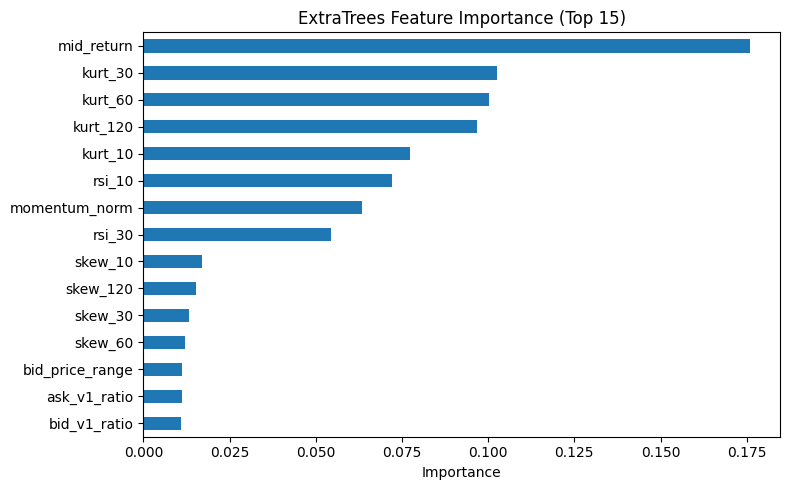

In [22]:
!pip install lightgbm --quiet
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor   

# Adding the same asset features 

def engineer_features(df: pd.DataFrame) -> pd.DataFrame:
    
    if 'timestamp' in df.columns:
        df['timestamp'] = pd.to_datetime(df['timestamp'])
        df = df.set_index('timestamp')

    # Mid price
    df['mid_price'] = (df['ask_price1'] + df['bid_price1']) / 2


    df['spread'] = df['ask_price1'] - df['bid_price1']

    # Price Ranges
    df['ask_price_range'] = df['ask_price1'] - df['ask_price5']
    df['bid_price_range'] = df['bid_price5'] - df['bid_price1']

    # Relative Distance
    df['ask_rel_dist'] = (df['ask_price1'] / df['mid_price']) - 1.0
    df['bid_rel_dist'] = 1.0 - (df['bid_price1'] / df['mid_price'])

    # Total Volumes
    ask_vol_cols = [f'ask_volume{i}' for i in range(1, 6)]
    bid_vol_cols = [f'bid_volume{i}' for i in range(1, 6)]
    df['total_ask_vol'] = df[ask_vol_cols].sum(axis=1)
    df['total_bid_vol'] = df[bid_vol_cols].sum(axis=1)

   

    # Ask Bid Vol Imbalance 
    df['imbalance'] = df['total_bid_vol'] / (df['total_bid_vol'] + df['total_ask_vol'] + 1e-9)

    # Volume Depth Ratios
    df['ask_v1_ratio'] = df['ask_volume1'] / (df['total_ask_vol'] + 1e-9)
    df['bid_v1_ratio'] = df['bid_volume1'] / (df['total_bid_vol'] + 1e-9)


   # Volume Slope 
    df['ask_v5_ratio'] = df['ask_volume5'] / (df['total_ask_vol'] + 1e-9)
    df['bid_v5_ratio'] = df['bid_volume5'] / (df['total_bid_vol'] + 1e-9)

   # Rolling Volume
    df["ask_total_vol_roll5"] = df["total_ask_vol"].rolling(window=5, min_periods=1).sum()
    df["bid_total_vol_roll5"] = df["total_bid_vol"].rolling(window=5, min_periods=1).sum()

    df['mid_change'] = abs(df['mid_price'] - df['mid_price'].shift(1))
    df['mid_return'] = df['mid_price'].pct_change()
    df['mid_return_t1'] = df['mid_return'].shift(1).fillna(0)
    df['mid_return_t2'] = df['mid_return'].shift(2).fillna(0)
    df['mid_return_t3'] = df['mid_return'].shift(3).fillna(0)
    df['mid_return_t4'] = df['mid_return'].shift(4).fillna(0)
    df['mid_return_t5'] = df['mid_return'].shift(5).fillna(0)
    df['mid_return_t6'] = df['mid_return'].shift(6).fillna(0)
    df['mid_return_t7'] = df['mid_return'].shift(7).fillna(0)
    df['mid_return_t8'] = df['mid_return'].shift(8).fillna(0)
    df['mid_return_t9'] = df['mid_return'].shift(9).fillna(0)
    df['mid_return_t10'] = df['mid_return'].shift(10).fillna(0)

        #Rolling Skew / Kurt
    for w in [10, 30, 60, 120]:  # 10s, 30s, 1m, 2m
        df[f'skew_{w}'] = df['mid_return'].rolling(window=w).skew().fillna(0)
        df[f'kurt_{w}'] = df['mid_return'].rolling(window=w).kurt().fillna(0)
     
     
    # RSI 10 s and 30s Indicator 

    df['return'] = df['mid_price'].pct_change()
    df['up'] = df['return'].clip(lower=0)
    df['down'] = -df['return'].clip(upper=0)
    window = 10
    df['avg_up'] = df['up'].rolling(window).mean()
    df['avg_down'] = df['down'].rolling(window).mean()
    df['rsi_like'] = df['avg_up'] / (df['avg_down'] + 1e-8)
    df['rsi_10'] = 100 - (100 / (1 + df['rsi_like']))


    window1 = 30
    df['avg_up'] = df['up'].rolling(window1).mean()
    df['avg_down'] = df['down'].rolling(window1).mean()
    df['rsi_like'] = df['avg_up'] / (df['avg_down'] + 1e-8)
    df['rsi_30'] = 100 - (100 / (1 + df['rsi_like']))

   # Price Momentum(10s , 60s) Window 
    short_win = 10   
    long_win = 60    

    df['sma_short'] = df['mid_price'].rolling(window=short_win, min_periods=1).mean()
    df['sma_long'] = df['mid_price'].rolling(window=long_win, min_periods=1).mean()

    # Price momentum feature
    df['momentum'] = df['sma_short'] - df['sma_long']
    df['momentum_norm'] = df['momentum'] / df['sma_long']

    # Lagged Absolute Volume Changes
    df['abs_ask_vol_change1'] = ((df['ask_volume1'] - df['ask_volume1'].shift(1)) + (df['ask_volume2'] - df['ask_volume2'].shift(1)) + (df['ask_volume3'] - df['ask_volume3'].shift(1)) + (df['ask_volume4'] - df['ask_volume4'].shift(1)) + (df['ask_volume5'] - df['ask_volume5'].shift(1)))
    df['abs_bid_vol_change1'] = ((df['bid_volume1'] - df['bid_volume1'].shift(1)) + (df['bid_volume2'] - df['bid_volume2'].shift(1)) + (df['bid_volume3'] - df['bid_volume3'].shift(1)) + (df['bid_volume4'] - df['bid_volume4'].shift(1)) + (df['bid_volume5'] - df['bid_volume5'].shift(1)))

    df['abs_ask_vol_change2'] = df['abs_ask_vol_change1'].shift(1)
    df['abs_bid_vol_change2'] = df['abs_bid_vol_change1'].shift(1)

    df['abs_ask_vol_change3'] = df['abs_ask_vol_change1'].shift(2)
    df['abs_bid_vol_change3'] = df['abs_bid_vol_change1'].shift(2)

    df['abs_ask_vol_change4'] = df['abs_ask_vol_change1'].shift(3)
    df['abs_bid_vol_change4'] = df['abs_bid_vol_change1'].shift(3)

    df['abs_ask_vol_change5'] = df['abs_ask_vol_change1'].shift(4)
    df['abs_bid_vol_change5'] = df['abs_bid_vol_change1'].shift(4)

    # Rolling Volatility(10s , 30s ,60s)
    df['vol_10s'] = df['mid_return'].rolling(window=10).std()
    df['vol_30s'] = df['mid_return'].rolling(window=30).std()
    df['vol_60s'] = df['mid_return'].rolling(window=60).std()

    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.ffill().bfill()   



    return df


df = engineer_features(df)


engineered_features = [
    'ask_price_range', 'bid_price_range',
    'imbalance',
    'ask_v1_ratio', 'bid_v1_ratio',
     'ask_v5_ratio' , 'bid_v5_ratio' ,
     'mid_return' , 'spread' ,'mid_return_t6' ,  'mid_return_t5' ,
     'mid_return_t1' , 'mid_return_t3', 'mid_return_t2'
      ,'mid_return_t4' , 'mid_return_t7', 'mid_return_t8'
     , 'mid_return_t9' , 'mid_return_t10', 
    'momentum_norm' ,
    'skew_10' , 'kurt_10',
    'skew_30' , 'kurt_30',
    'skew_60' , 'kurt_60',
    'skew_120' , 'kurt_120',
   'rsi_10' ,  'rsi_30',
    'abs_ask_vol_change1','abs_bid_vol_change1' , 'abs_ask_vol_change2','abs_bid_vol_change2'
    , 'abs_ask_vol_change3','abs_bid_vol_change3'  , 'abs_ask_vol_change4','abs_bid_vol_change4' , 'abs_ask_vol_change5','abs_bid_vol_change5',
     'ask_total_vol_roll5','bid_total_vol_roll5'

]

features = engineered_features
target = 'label'

df = df.dropna(subset=[target])
X = df[features].copy()
y = df[target].copy()
X = X.replace([np.inf, -np.inf], np.nan)

# Clip extreme values
X = X.clip(lower=-1e6, upper=1e6)

X = X.ffill().bfill()


train_size = 0.8
split_idx = int(len(X) * train_size)

X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

#Train Extremely Randomized Trees 
et_model = ExtraTreesRegressor(
    n_estimators=200,      
    max_depth=20,           
    n_jobs=-1,             
    random_state=42,
    bootstrap=False         
)
et_model.fit(X_train, y_train)

# Evaluate
y_pred = et_model.predict(X_test)


# sMAPE
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred) + 1e-9))

# MASE
naive_pred = np.roll(y_test, 1)
naive_pred[0] = y_test.iloc[0]
mase = mean_absolute_error(y_test, y_pred) / mean_absolute_error(y_test, naive_pred)

# R²
r2 = r2_score(y_test, y_pred)

print(f"sMAPE: {smape:.4%}")
print(f"MASE : {mase:.4f}")
print(f"R²   : {r2:.4f}")

# Feature importance
importances = pd.Series(et_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop feature importances:\n", importances.head(15))

plt.figure(figsize=(8, 5))
importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("ExtraTrees Feature Importance (Top 15)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [23]:
# Retrain on FULL dataset
et_model.fit(X, y)

test_df = pd.read_csv("/kaggle/input/gq-implied-volatility-forecasting/test/ETH.csv")


test_df = engineer_features(test_df)


X_test_final = test_df[features].copy()
X_test_final = X_test_final.ffill().bfill()


y_test_pred = et_model.predict(X_test_final)


submission = pd.DataFrame({
    "timestamp": range(1, len(y_test_pred) + 1),  # 1, 2, 3, ...
    "labels": y_test_pred
})


# submission.to_csv("submission2.csv", index=False)

/tmp/ipykernel_36/3973597239.py:52: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['mid_return'] = df['mid_price'].pct_change()
/tmp/ipykernel_36/3973597239.py:72: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['return'] = df['mid_price'].pct_change()
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


Results With LightGBM :
* sMAPE: 44.0213%
* MASE : 3.7422
* R²   : 0.3974

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.141700 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10101
[LightGBM] [Info] Number of data points in the train set: 505033, number of used features: 42
[LightGBM] [Info] Start training from score 0.000049


/tmp/ipykernel_36/4245376092.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_pred[0] = y_test[0]


RMSE : 0.00008257
sMAPE: 44.0213%
MASE : 3.7422
R²   : 0.3974

Top feature importances:
 momentum_norm          4317
kurt_120               4247
skew_120               3828
kurt_60                3359
skew_60                3337
rsi_30                 2993
kurt_30                2824
skew_30                2769
rsi_10                 1961
kurt_10                1920
ask_total_vol_roll5    1887
skew_10                1831
bid_total_vol_roll5    1798
mid_return             1744
ask_price_range        1420
dtype: int32


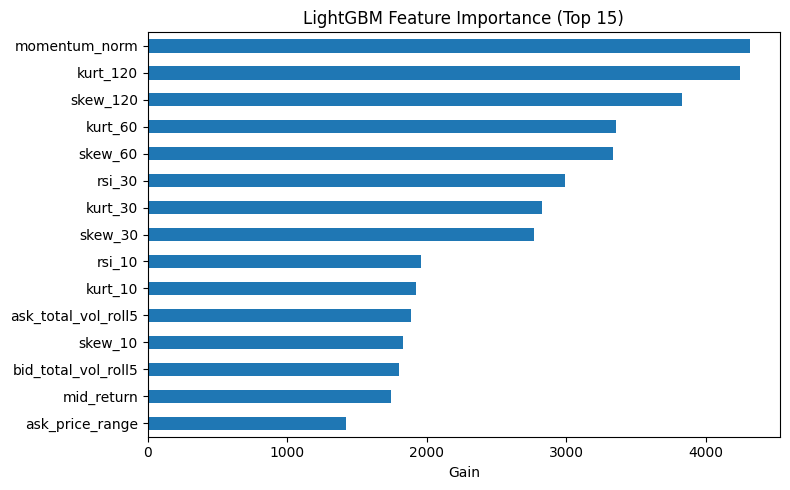

In [24]:
lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.03,
    num_leaves=63,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)

lgb_model.fit(X_train, y_train)


y_pred = lgb_model.predict(X_test)



smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred) + 1e-9))


naive_pred = np.roll(y_test, 1)
naive_pred[0] = y_test[0]  
mase = mean_absolute_error(y_test, y_pred) / mean_absolute_error(y_test, naive_pred)


r2   = r2_score(y_test, y_pred)


print(f"RMSE : {rmse:.8f}")
print(f"sMAPE: {smape:.4%}")
print(f"MASE : {mase:.4f}")
print(f"R²   : {r2:.4f}")

# Feature importance
importances = pd.Series(lgb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nTop feature importances:\n", importances.head(15))

plt.figure(figsize=(8, 5))
importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("LightGBM Feature Importance (Top 15)")
plt.xlabel("Gain")
plt.tight_layout()
plt.show()


In [25]:
lgb_model.fit(X, y)

# Load test dataset
test_df = pd.read_csv("/kaggle/input/gq-implied-volatility-forecasting/test/ETH.csv")

# Applying same feature engineering
test_df = engineer_features(test_df)

X_test_final = test_df[features].copy()
X_test_final = X_test_final.ffill().bfill()

# Predict
y_test_pred = lgb_model.predict(X_test_final)

submission = pd.DataFrame({
    "timestamp": range(1, len(y_test_pred) + 1),  # 1, 2, 3, ...
    "labels": y_test_pred
})

# Save as CSV with headers
submission.to_csv("submission3.csv", index=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.182781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10118
[LightGBM] [Info] Number of data points in the train set: 631292, number of used features: 42
[LightGBM] [Info] Start training from score 0.000062


/tmp/ipykernel_36/3973597239.py:52: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['mid_return'] = df['mid_price'].pct_change()
/tmp/ipykernel_36/3973597239.py:72: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['return'] = df['mid_price'].pct_change()
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


Results With Stacked Ensemble of Xtratrees & LightGBM :
 * sMAPE: 77.1009%
 * MASE: 6.5144
 * R²: -0.5932

In [26]:
from sklearn.linear_model import Ridge

# Training base models
lgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)

# Base model predictions 
preds_train = np.column_stack([
    lgb_model.predict(X_train),
    et_model.predict(X_train)
])
preds_test = np.column_stack([
    lgb_model.predict(X_test),
    et_model.predict(X_test)
])

# Meta-model (Ridge learns optimal blending weights)
meta_model = Ridge(alpha=1.0)
meta_model.fit(preds_train, y_train)

# Final ensemble predictions
y_pred_stack = meta_model.predict(preds_test)

# Evaluate
smape = np.mean(2 * np.abs(y_pred_stack - y_test) / (np.abs(y_test) + np.abs(y_pred_stack) + 1e-9))
naive_pred = np.roll(y_test, 1)
naive_pred[0] = y_test[0]
mase = mean_absolute_error(y_test, y_pred_stack) / mean_absolute_error(y_test, naive_pred)
r2   = r2_score(y_test, y_pred_stack)

print(f" sMAPE: {smape:.4%}, MASE: {mase:.4f}, R²: {r2:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.140449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10101
[LightGBM] [Info] Number of data points in the train set: 505033, number of used features: 42
[LightGBM] [Info] Start training from score 0.000049
 sMAPE: 77.1009%, MASE: 6.5144, R²: -0.5932


/tmp/ipykernel_36/88446109.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_pred[0] = y_test[0]


Results With Averaged Ensemble of Xtratrees & LightGBM :
* sMAPE: 44.4279%
* MASE : 3.7992
* R²   : 0.3731

In [27]:
# Training LightGBM
lgb_model.fit(X_train, y_train)

# Training ExtraTrees

et_model.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb_model.predict(X_test)
y_pred_et  = et_model.predict(X_test)

# Simple average (equal weights)
y_pred_ensemble = (y_pred_lgb + y_pred_et) / 2

# Evaluate Ensemble
smape = np.mean(2 * np.abs(y_pred_ensemble - y_test) / (np.abs(y_test) + np.abs(y_pred_ensemble) + 1e-9))
naive_pred = np.roll(y_test, 1)
naive_pred[0] = y_test[0]
mase = mean_absolute_error(y_test, y_pred_ensemble) / mean_absolute_error(y_test, naive_pred)
r2   = r2_score(y_test, y_pred_ensemble)

print(f"sMAPE: {smape:.4%}")
print(f"MASE : {mase:.4f}")
print(f"R²   : {r2:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.148903 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10101
[LightGBM] [Info] Number of data points in the train set: 505033, number of used features: 42
[LightGBM] [Info] Start training from score 0.000049
sMAPE: 44.4279%
MASE : 3.7992
R²   : 0.3731


/tmp/ipykernel_36/2236578894.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_pred[0] = y_test[0]


In [28]:
lgb_model.fit(X, y)
et_model.fit(X, y)

test_df = pd.read_csv("/kaggle/input/gq-implied-volatility-forecasting/test/ETH.csv")


test_df = engineer_features(test_df)


X_test_final = test_df[features].copy()
X_test_final = X_test_final.ffill().bfill()


y_pred_lgb = lgb_model.predict(X_test_final)
y_pred_et  = et_model.predict(X_test_final)


y_pred_ensemble = (y_pred_lgb + y_pred_et) / 2


submission = pd.DataFrame({
    "timestamp": range(1, len(y_pred_ensemble) + 1),  # 1, 2, 3, ...
    "labels": y_pred_ensemble
})


# submission.to_csv("submission4.csv", index=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.174105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10118
[LightGBM] [Info] Number of data points in the train set: 631292, number of used features: 42
[LightGBM] [Info] Start training from score 0.000062


/tmp/ipykernel_36/3973597239.py:52: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['mid_return'] = df['mid_price'].pct_change()
/tmp/ipykernel_36/3973597239.py:72: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df['return'] = df['mid_price'].pct_change()
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


Results With CatBoost : 
* sMAPE: 44.1423%
* MASE : 3.7542
* R²   : 0.3872

0:	learn: 0.0000479	total: 168ms	remaining: 2m 48s
200:	learn: 0.0000366	total: 15.9s	remaining: 1m 3s
400:	learn: 0.0000361	total: 32.4s	remaining: 48.4s
600:	learn: 0.0000356	total: 49.4s	remaining: 32.8s
800:	learn: 0.0000352	total: 1m 7s	remaining: 16.7s
999:	learn: 0.0000348	total: 1m 24s	remaining: 0us


/tmp/ipykernel_36/2928043358.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_pred[0] = y_test[0]


RMSE : 0.00006450
sMAPE: 44.1423%
MASE : 3.7542
R²   : 0.3872

Top feature importances:
 mid_return       20.309865
rsi_10           14.927986
momentum_norm    10.819914
kurt_120         10.450762
kurt_60           5.491967
kurt_10           5.214995
rsi_30            4.612377
kurt_30           4.029394
skew_120          2.376331
mid_return_t1     1.591374
skew_30           1.587558
skew_10           1.447273
skew_60           1.347792
mid_return_t2     1.284540
mid_return_t3     1.212081
dtype: float64


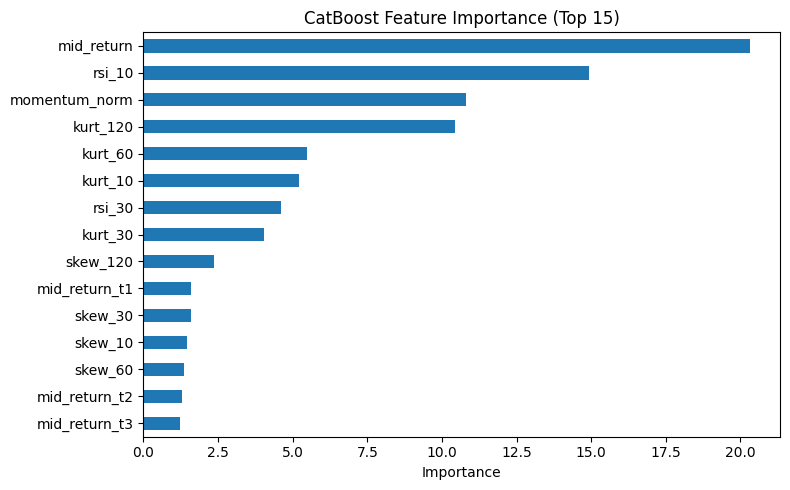

In [29]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(
    iterations=1000,       
    learning_rate=0.03,
    depth=8,               
    subsample=0.9,
    random_seed=42,
    loss_function='RMSE',  
    verbose=200           
)

# Training CATboost model
cat_model.fit(X_train, y_train)

# Prediction on test Dataset
y_pred = cat_model.predict(X_test)

# Evaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred) + 1e-9))

naive_pred = np.roll(y_test, 1)
naive_pred[0] = y_test[0]
mase = mean_absolute_error(y_test, y_pred) / mean_absolute_error(y_test, naive_pred)

r2   = r2_score(y_test, y_pred)

print(f"RMSE : {rmse:.8f}")
print(f"sMAPE: {smape:.4%}")
print(f"MASE : {mase:.4f}")
print(f"R²   : {r2:.4f}")

# Feature Importance
importances = pd.Series(cat_model.get_feature_importance(), index=X_train.columns).sort_values(ascending=False)
print("\nTop feature importances:\n", importances.head(15))

plt.figure(figsize=(8, 5))
importances.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("CatBoost Feature Importance (Top 15)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


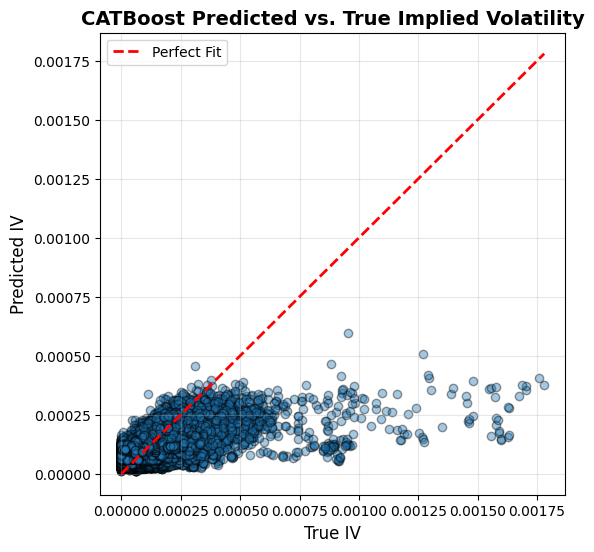

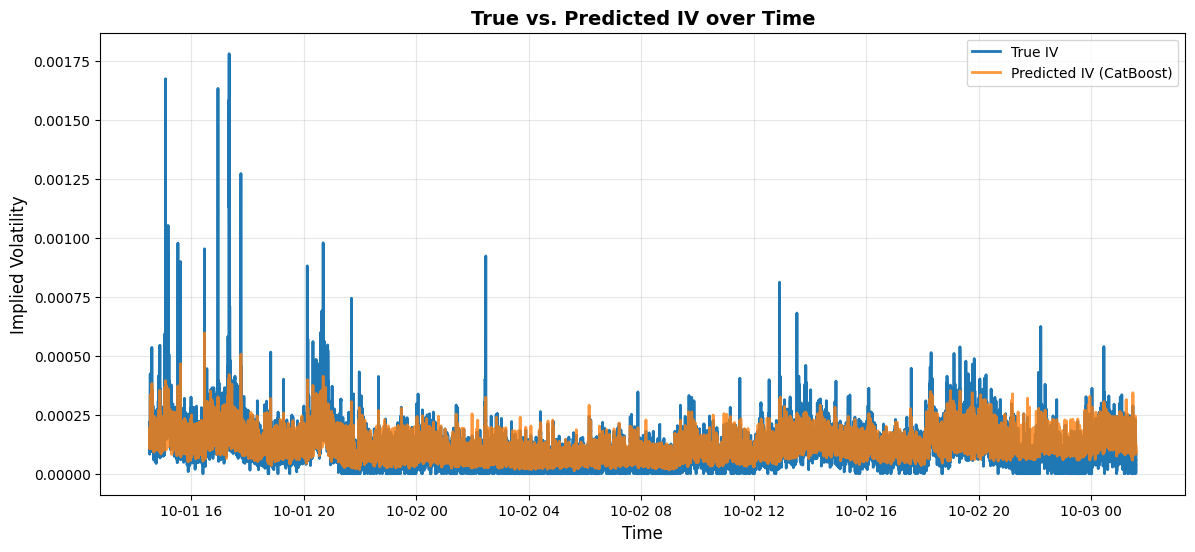

In [30]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         "r--", lw=2, label="Perfect Fit")

plt.xlabel("True IV", fontsize=12)
plt.ylabel("Predicted IV", fontsize=12)
plt.title("CATBoost Predicted vs. True Implied Volatility", fontsize=14, weight="bold")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test.values, label="True IV", lw=2)
plt.plot(y_test.index, y_pred, label="Predicted IV (CatBoost)", lw=2, alpha=0.8)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Implied Volatility", fontsize=12)
plt.title("True vs. Predicted IV over Time", fontsize=14, weight="bold")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# # Retrain on FULL dataset
# cat_model.fit(X, y)

# test_df = pd.read_csv("/kaggle/input/gq-implied-volatility-forecasting/test/ETH.csv")

# test_df = engineer_features(test_df)


# X_test_final = test_df[features].copy()
# X_test_final = X_test_final.ffill().bfill()

# # Predict
# y_test_pred = cat_model.predict(X_test_final)


# submission = pd.DataFrame({
#     "timestamp": range(1, len(y_test_pred) + 1),  # 1, 2, 3, ...
#     "labels": y_test_pred
# })


# submission.to_csv("submission5.csv", index=False)

Weighted Average Ensemble of (CatBoost , Extratrees , LightGBM ):
* sMAPE: 44.0213%
* MASE : 3.7422
* R²   : 0.3974

In [31]:
 # Train each model 
lgb_model.fit(X_train, y_train)
et_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Predictions 
y_pred_lgb = lgb_model.predict(X_test)
y_pred_et  = et_model.predict(X_test)
y_pred_cat = cat_model.predict(X_test)

# Defining grid search for best weights 
best_score = float("inf")
best_weights = None

for w1 in np.arange(0, 1.05, 0.1):
    for w2 in np.arange(0, 1.05 - w1, 0.1):
        w3 = 1 - w1 - w2
        if w3 < 0: 
            continue
        
        # Weighted average
        y_pred_ensemble = (w1 * y_pred_lgb) + (w2 * y_pred_et) + (w3 * y_pred_cat)

        # metric: RMSE
        rmse = mean_squared_error(y_test, y_pred_ensemble, squared=False)

        if rmse < best_score:
            best_score = rmse
            best_weights = (w1, w2, w3)

print(f"Best Weights (LGB, ET, CAT): {best_weights}")
print(f"Best RMSE: {best_score:.6f}")

# Evaluate Ensemble
smape = np.mean(2 * np.abs(y_pred_ensemble - y_test) / (np.abs(y_test) + np.abs(y_pred_ensemble) + 1e-9))
naive_pred = np.roll(y_test, 1)
naive_pred[0] = y_test[0]
mase = mean_absolute_error(y_test, y_pred_ensemble) / mean_absolute_error(y_test, naive_pred)
r2   = r2_score(y_test, y_pred_ensemble)

print(f"sMAPE: {smape:.4%}")
print(f"MASE : {mase:.4f}")
print(f"R²   : {r2:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.136132 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10101
[LightGBM] [Info] Number of data points in the train set: 505033, number of used features: 42
[LightGBM] [Info] Start training from score 0.000049
0:	learn: 0.0000479	total: 117ms	remaining: 1m 56s
200:	learn: 0.0000366	total: 15.9s	remaining: 1m 3s
400:	learn: 0.0000361	total: 32.7s	remaining: 48.8s
600:	learn: 0.0000356	total: 49.7s	remaining: 33s
800:	learn: 0.0000352	total: 1m 7s	remaining: 16.8s
999:	learn: 0.0000348	total: 1m 24s	remaining: 0us
Best Weights (LGB, ET, CAT): (0.9, 0.0, 0.09999999999999998)
Best RMSE: 0.000064
sMAPE: 44.0213%
MASE : 3.7422
R²   : 0.3974


/tmp/ipykernel_36/184919307.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  naive_pred[0] = y_test[0]


In [ ]:
# lgb_model.fit(X, y)
# et_model.fit(X, y)
# cat_model.fit(X, y)

# # Final Predictions on test set
# y_pred_lgb = lgb_model.predict(X_test_final)
# y_pred_et  = et_model.predict(X_test_final)
# y_pred_cat = cat_model.predict(X_test_final)

# # Apply best weights
# final_pred = (best_weights[0] * y_pred_lgb +
#               best_weights[1] * y_pred_et +
#               best_weights[2] * y_pred_cat)

# submission = pd.DataFrame({
#     "timestamp": range(1, len(final_pred) + 1),  # 1, 2, 3, ...
#     "labels": final_pred
# })

# # Save as CSV with headers
# submission.to_csv("submission6.csv", index=False)

**Implementing self-contained TCN (1D conv.) With CatBoost** 
* sMAPE: 48.5153%
* MASE : 4.3662
* R²   : 0.1511

In [32]:
from catboost import CatBoostRegressor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout


def build_tcn(input_shape, nb_filters=64, kernel_size=3, dilations=[1, 2, 4, 8], dropout_rate=0.1):
    model = Sequential()
    for i, d in enumerate(dilations):
        model.add(Conv1D(
            filters=nb_filters,
            kernel_size=kernel_size,
            dilation_rate=d,
            padding="causal",
            activation="relu",
            input_shape=input_shape if i == 0 else None
        ))
        model.add(Dropout(dropout_rate))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model


n_samples, n_features = 5000, 10
df = pd.DataFrame(np.random.randn(n_samples, n_features), columns=[f"f{i}" for i in range(n_features)])
df["target"] = np.random.randn(n_samples)



def create_sequences(X, y, seq_len=20):
    Xs, ys = [], []
    for i in range(len(X) - seq_len):
        Xs.append(X.iloc[i:(i + seq_len)].values)
        ys.append(y.iloc[i + seq_len])
    return np.array(Xs), np.array(ys)

seq_len = 20
X_seq_train, y_seq_train = create_sequences(X_train, y_train, seq_len)
X_seq_test, y_seq_test = create_sequences(X_test, y_test, seq_len)


cat_model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=8,
    loss_function="RMSE",
    verbose=100,
    random_seed=42
)

cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)


tcn_model = build_tcn(input_shape=(seq_len, X_seq_train.shape[2]))
tcn_model.fit(
    X_seq_train, y_seq_train,
    epochs=10, batch_size=32,
    validation_split=0.1,
    verbose=1
)

y_pred_tcn = tcn_model.predict(X_seq_test).flatten()


alpha = 0.5  # weight for CatBoost vs TCN
y_pred_ensemble = alpha * y_pred_cat[-len(y_pred_tcn):] + (1 - alpha) * y_pred_tcn


def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred) + 1e-9))

def mase(y_true, y_pred):
    naive = np.roll(y_true, 1)
    naive[0] = y_true[0]
    return mean_absolute_error(y_true, y_pred) / mean_absolute_error(y_true, naive)

rmse = mean_squared_error(y_seq_test, y_pred_ensemble, squared=False)
r2   = r2_score(y_seq_test, y_pred_ensemble)
smape_val = smape(y_seq_test, y_pred_ensemble)
mase_val  = mase(y_seq_test, y_pred_ensemble)

print(f"RMSE : {rmse:.6f}")
print(f"sMAPE: {smape_val:.4%}")
print(f"MASE : {mase_val:.4f}")
print(f"R²   : {r2:.4f}")


2025-08-29 11:04:57.155087: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756465497.439031      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756465497.524698      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


0:	learn: 0.0000476	total: 154ms	remaining: 1m 16s
100:	learn: 0.0000368	total: 8.16s	remaining: 32.2s
200:	learn: 0.0000363	total: 16.3s	remaining: 24.2s
300:	learn: 0.0000359	total: 24.4s	remaining: 16.1s
400:	learn: 0.0000355	total: 32.7s	remaining: 8.08s
499:	learn: 0.0000351	total: 41.1s	remaining: 0us


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-29 11:06:32.496425: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 152s 10ms/step - loss: 489.3393 - val_loss: 9.2730e-07
Epoch 2/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 148s 10ms/step - loss: 3.3419e-04 - val_loss: 2.6083e-09
Epoch 3/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 148s 10ms/step - loss: 1.4844e-04 - val_loss: 2.6222e-09
Epoch 4/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 148s 10ms/step - loss: 1.0714e-04 - val_loss: 2.6075e-09
Epoch 5/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 148s 10ms/step - loss: 1.5444e-04 - val_loss: 2.7381e-09
Epoch 6/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 147s 10ms/step - loss: 2.9819e-05 - val_loss: 3.0445e-09
Epoch 7/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 149s 10ms/step - loss: 2.0183e-04 - val_loss: 2.6057e-09
Epoch 8/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 149s 10ms/step - loss: 1.2184e-06 - val_loss: 2.6044e-09
Epoch 9/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 149s 10ms/step - loss: 2.1853e-05 - val_loss: 5.6049e-09
Epoch 10/10
14204/14204 ━━━━━━━━━━━━━━━━━━━━ 148s 10ms/step - loss: 4.9541e-09 - val_loss: 2.